In [1]:
%load_ext autoreload
%autoreload 2
# You can load your python module as this:
import modelproject.chxmodelproject as chx

In [2]:
import numpy as np
import sympy as sm
#%matplotlib inline
import matplotlib.pyplot as plt
from sympy import *

#### A small open economy in with fixed exchange rate in the short run

$Y$ is production and is equal the planned demand $PD$:
$$ Y = AD $$

$PD$ consists of consumption $C$, investments $I$, public consumption $G$ and the netto export $NX$:
$$ AD = C + I + \bar{G} + NX $$

Private consumption is a linear function of the production left after taxes. $b$ is the marginal consumption rate. 
$$ C = a + b (Y-\bar{T}), \quad a > 0, 0<b<1 $$

Investments goes down if the interest rate $r$ rises:
$$ I = c - dr, \quad c,d>0 $$
Because of free capital movement the real domestic interest rate equals the real foreign interest rate, $r^*$
$$ r = \bar{r}^* $$

Net export goes down if the real exchange rate goes up:
$$ NX = f - g \epsilon, \quad f,g, >0 $$

The real exchange rate is determined by the nominal exchange rate and the relative price ratio between the domestic and foreign price level.
$$ \epsilon = \frac{\bar{e} \bar{P}}{\bar{P}^*} $$

The nominel quantity of money, $M$ relative to prices depends on domestic production and the interest rate. 
$$ \frac{M}{\bar{P}} = h Y - jr, \quad h,j >0 $$

As we are in the short run. Prices, public expenditure, taxes, the foreign interest rate are all exogenous.

$$ AD = a + b ( Y - \bar{T}) + I + G + NX$$


In [3]:
Y, AD, a, b, T, I, G, NX = sm.symbols('Y, AD, a, b, T, I, G, NX')

In [4]:
eq_AD = sm.Eq(Y, a + b*(Y-T) + I + G + NX)
ss = sm.solve(eq_AD, Y)[0]
yss = sm.factor(ss)

yss

-(G + I + NX - T*b + a)/(b - 1)

In [5]:
ss_func = sm.lambdify((T, I, G, NX, a, b), yss)

Steady state for the Keynesian cross is: Y = 115.71428571428572
Steady state for the Keynesian cross is: Y = 115.71428571428572


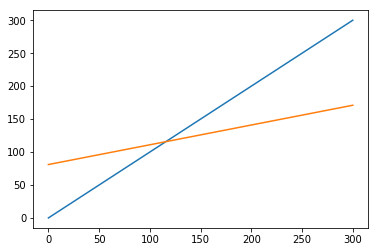

In [6]:
T = 30
I = 20
G = 30
NX = 10
a = 30
b = 0.3

cross = chx.keynesian_cross(T, I, G, NX, a, b)
steady_state = chx.ss_cross(T, I, G, NX, a, b)

print(f'Steady state for the Keynesian cross is: Y = {steady_state}')
print(f'Steady state for the Keynesian cross is: Y = {ss_func(T, I, G, NX, a, b)}')